## Metodo Chi2

In [1]:
//%jsroot on

In [2]:
#include "TH1.h"
#include "TH1D.h"
#include "TF1.h"
#include "TGraph.h"
#include "TGraphQQ.h"
#include "TCanvas.h"
#include "TStyle.h"
#include "TMath.h"

In [3]:
TFile *dataset = new TFile("/eos/user/t/tester1/SWAN_projects/MILDRED/ZZDiBoson/Analysis/Output_ZZDiBosonAnalysis/data.root");

In [4]:
gStyle->SetOptFit(1112);//información sobre los parámetros de ajuste impresos en el cuadro de estadísticas del histograma 
gStyle->SetOptStat("emnrou");//e:número de entradas impresas(Entries),m:valor medio impreso(Mean),r:rms impreso(Std Dev),n:se imprime el nombre del histograma

In [5]:
TH1F *m_four_lep=(TH1F*)dataset->Get("hist_fourlepsys_m");
m_four_lep->ClearUnderflowAndOverflow();
//TH1::StatOverflows(kTRUE); 
m_four_lep->Print(); // Lectura de datos

TH1.Print Name  = hist_fourlepsys_m, Entries= 96, Total sum= 92


In [6]:
/*Double_t myLandau(Double_t* x, Double_t* par)
{
   if (par[2] <= 0) 
       return 0; 
   Double_t den = ::ROOT::Math::landau_pdf( (x[0]-par[1])/par[2] ); 
   if (!par[3])
       return den;
   return par[0]*den/par[2];
}*/

In [7]:
TCanvas *c2 = new TCanvas("c2","c2",10,10,700,600);

In [8]:
//h1->Draw("E1");
TF1 *fit1=new TF1("fit1","landau",120,500);
fit1->SetParameters(1, m_four_lep->GetRMS(), m_four_lep->GetMean());
m_four_lep->Fit("fit1", " "," ",120,500);
m_four_lep->Draw("E1");

 FCN=9.23757 FROM MIGRAD    STATUS=CONVERGED     147 CALLS         148 TOTAL
                     EDM=7.03227e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.38487e+02   2.39120e+01   2.40775e-02   6.97571e-07
   2  MPV          2.10132e+02   5.63036e+00   4.50575e-03   3.39436e-05
   3  Sigma        1.93327e+01   2.85799e+00   1.60675e-05  -9.25977e-03


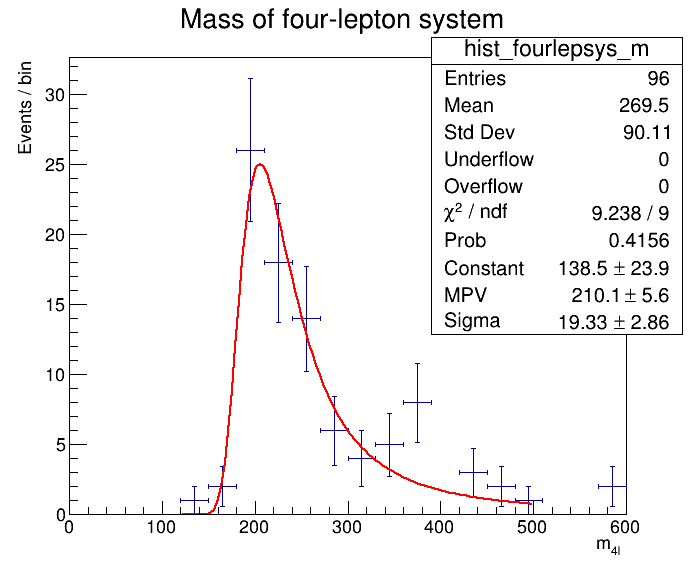

In [9]:
c2->Draw();